<a href="https://colab.research.google.com/github/ImranRiazChohan/BMWW_ML_Problem/blob/main/OPENAIMP(BMWW_PROJECT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4IZdbPzq2MPDes2x-IJ_q2B7wjisrPvRwCaunOhR1Cvy1MoUixkSA
Mounted at /content/drive


In [11]:
data=pd.read_csv("/content/drive/MyDrive/OPENAIMP(WORK)/Copy of train_subset_data.csv")
data.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,30,0.0,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,1
1,40,0.0,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
2,200,0.0,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
3,20,0.0,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
4,40,0.0,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1


In [14]:
data.shape

(5582, 25)

In [15]:
data.isnull().sum()

InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
PotentialFraud                     0
dtype: int64

<b>The data is cleaned </b>

In [16]:
data.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
count,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000
mean,418.509495,21.093458,1.560910,1.144214,0.192046,31.443389,444.393228,11.915980,11.942315,1.600860,1.418309,1.603189,1.857757,1.696345,1.578825,1.314583,1.245611,1.687388,1.690792,1.901290,4689.537800,508.102472,2170.354712,615.120029,0.804371
std,1620.352547,138.684116,0.496321,0.510928,0.393944,10.730358,234.541190,0.991777,0.706210,0.489766,0.493326,0.489280,0.349330,0.459876,0.493792,0.464391,0.430487,0.463599,0.462209,0.298299,10901.153159,1015.595947,3846.292656,967.344897,0.396720
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,1.000000,1.000000,0.000000,23.000000,280.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,430.000000,120.000000,1.000000
50%,80.000000,0.000000,2.000000,1.000000,0.000000,39.000000,440.000000,12.000000,12.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1075.000000,320.000000,1.000000
75%,200.000000,0.000000,2.000000,1.000000,0.000000,39.000000,620.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,4600.000000,1068.000000,2490.000000,730.000000,1.000000
max,57000.000000,1068.000000,2.000000,5.000000,1.000000,54.000000,910.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,136000.000000,13068.000000,38680.000000,9950.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


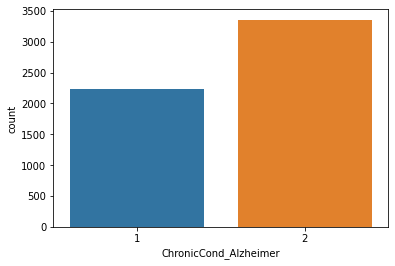

In [17]:
sns.countplot(data['ChronicCond_Alzheimer'])

In [18]:
data['Gender'].unique()

array([2, 1])

In [19]:
data.PotentialFraud.value_counts()

1    4490
0    1092
Name: PotentialFraud, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


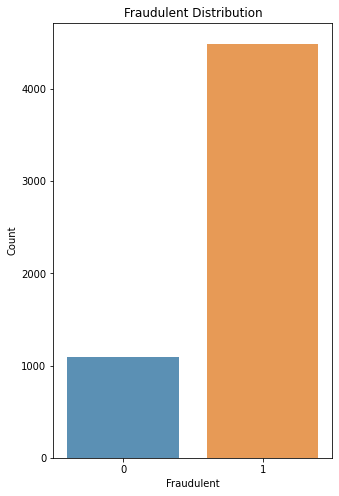

In [20]:
plt.figure(figsize=(5,8))
sns.barplot(data.PotentialFraud.value_counts().index, data.PotentialFraud.value_counts().values, alpha=0.8)
plt.title('Fraudulent Distribution')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


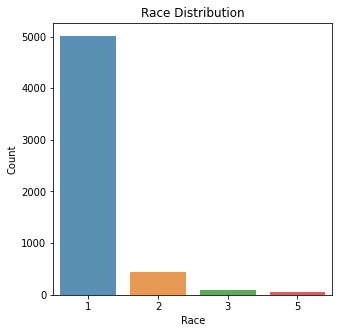

In [21]:
plt.figure(figsize=(5,5))
sns.barplot(data.Race.value_counts().index, data.Race.value_counts().values, alpha=0.8)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


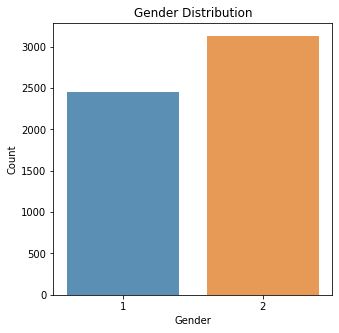

In [22]:
plt.figure(figsize=(5,5))
sns.barplot(data.Gender.value_counts().index,data.Gender.value_counts().values, alpha=0.8)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [23]:
chronic = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']

2    3354
1    2228
Name: ChronicCond_Alzheimer, dtype: int64
1    3247
2    2335
Name: ChronicCond_Heartfailure, dtype: int64
2    3367
1    2215
Name: ChronicCond_KidneyDisease, dtype: int64
2    4788
1     794
Name: ChronicCond_Cancer, dtype: int64
2    3887
1    1695
Name: ChronicCond_ObstrPulmonary, dtype: int64
2    3231
1    2351
Name: ChronicCond_Depression, dtype: int64
1    3826
2    1756
Name: ChronicCond_Diabetes, dtype: int64
1    4211
2    1371
Name: ChronicCond_IschemicHeart, dtype: int64
2    3837
1    1745
Name: ChronicCond_Osteoporasis, dtype: int64
2    3856
1    1726
Name: ChronicCond_rheumatoidarthritis, dtype: int64
2    5031
1     551
Name: ChronicCond_stroke, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

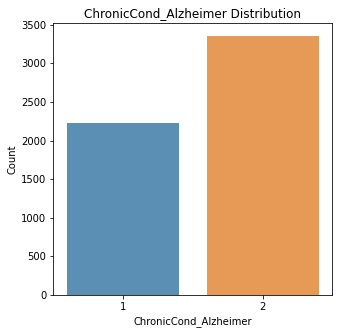

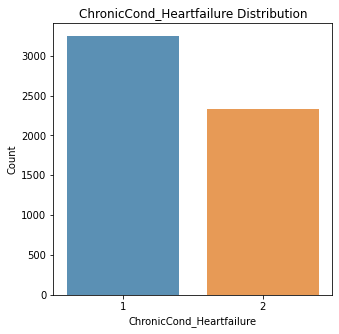

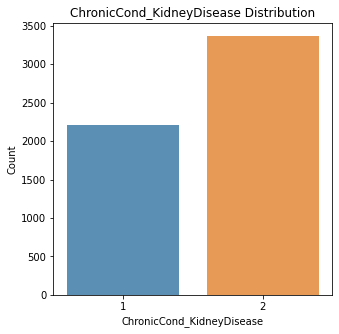

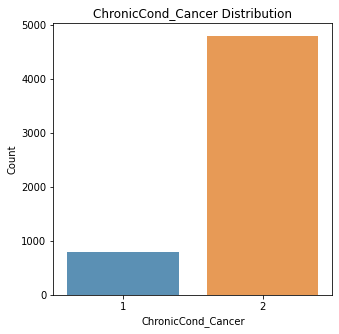

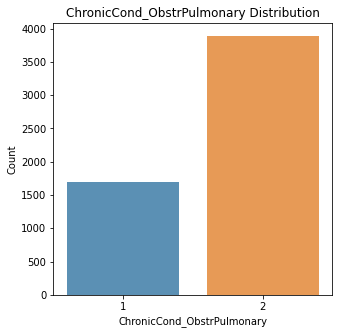

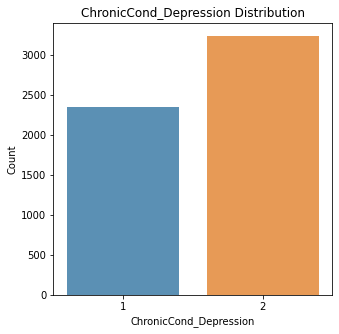

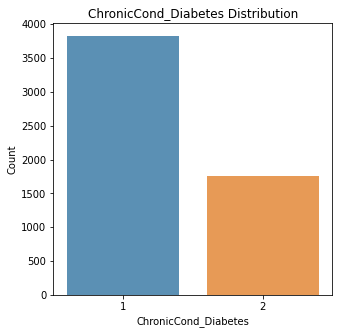

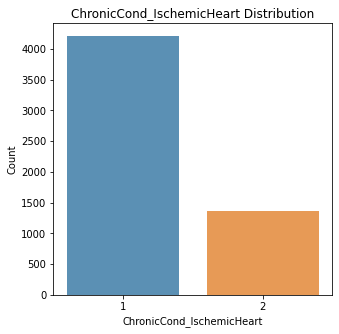

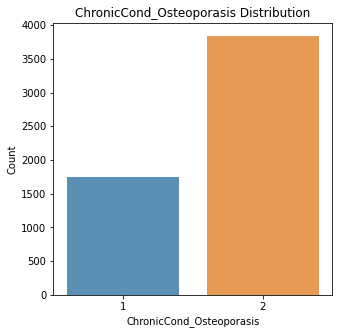

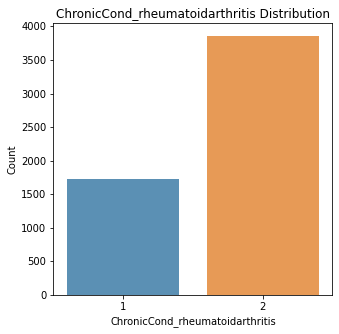

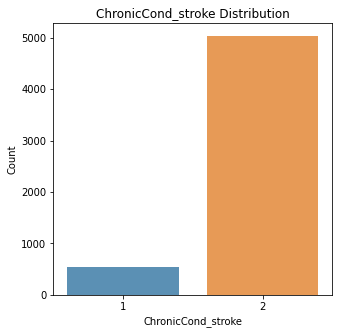

In [24]:
for chron in chronic:
    print(data[chron].value_counts())
    plt.figure(figsize=(5,5))
    sns.barplot(data[chron].value_counts().index, data[chron].value_counts().values, alpha=0.8)
    plt.title('{} Distribution'.format(chron))
    plt.ylabel('Count')
    plt.xlabel('{}'.format(chron))

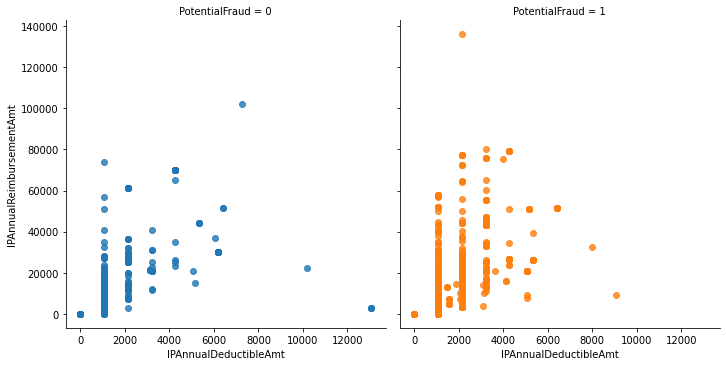

In [25]:
sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
               col='PotentialFraud',fit_reg=False,data=data)

###  As we see in the above graph,there is no visible difference in IpAnnualDeductibleAmt and IPAnnualReimbursementAmt.

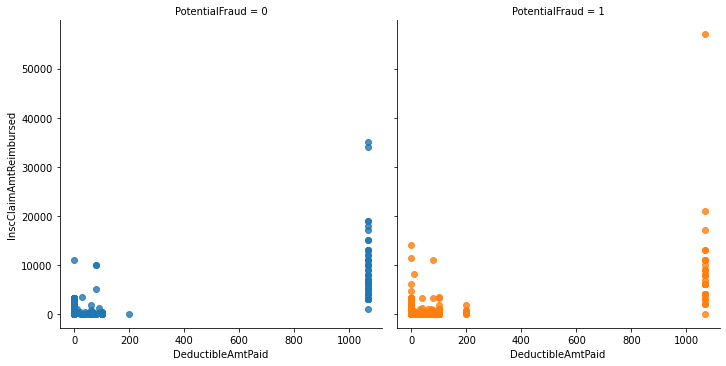

In [26]:
sns.lmplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',hue='PotentialFraud',
               col='PotentialFraud',fit_reg=False,data=data)

### We can not differentiate between fraud and non fraud cases based only on DeductibleAmtPaid and InscClaimAmtReimbursed.This lets us derive more features from datasets.



In [27]:
data.IPAnnualDeductibleAmt.value_counts()

0        3868
1068     1186
2136      316
3204       81
4272       43
5068       16
5340       11
6204       11
6408       11
1568        7
5136        6
3136        6
13068       3
1468        3
4136        2
3068        2
2068        2
1868        1
9068        1
7976        1
10204       1
7272        1
4004        1
6068        1
3604        1
Name: IPAnnualDeductibleAmt, dtype: int64

In [28]:
data.IPAnnualReimbursementAmt.value_counts()

0         3893
4000       106
3000        74
6000        64
5000        59
          ... 
16210        1
102200       1
12060        1
20100        1
8180         1
Name: IPAnnualReimbursementAmt, Length: 297, dtype: int64

In [29]:
data.DeductibleAmtPaid.value_counts()

0.000000       5255
1068.000000      95
100.000000       60
70.000000        25
60.000000        24
50.000000        23
40.000000        20
80.000000        19
30.000000        16
10.000000        13
90.000000        10
20.000000        10
200.000000        8
78.421085         4
Name: DeductibleAmtPaid, dtype: int64

In [30]:
x=data.iloc[:,0:-1].values
y=data.iloc[:,-1].values

In [31]:
x=x.astype(float)
y=y.astype(float)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41,shuffle=True)

In [33]:
model=RandomForestClassifier(random_state = 1,
                                  n_estimators = 750,
                                  max_depth = 15, 
                                  min_samples_split = 5,  min_samples_leaf = 1)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=750,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [34]:
model.score(x_train,y_train)

0.993505039193729

In [35]:
model.score(x_test,y_test)

0.9740376007162042

In [36]:
model1=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                              max_features=None, max_leaf_nodes=None,
                              min_impurity_split=1e-07, min_samples_leaf=1,
                              min_samples_split=2, min_weight_fraction_leaf=0.0,
                              presort=False, random_state=None, splitter='best')
model1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=1e-07,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
model1.score(x_train,y_train)

0.9993281075027995

In [38]:
model1.score(x_test,y_test)

0.9776186213070726

In [39]:
model2=SVC()
model2.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
model2.score(x_train,y_train)

0.8127659574468085

In [41]:
model2.score(x_test,y_test)

0.8254252461951657

## **Test own Real Data(UnSeen Data)**

In [47]:
test_data=pd.read_csv("/content/drive/MyDrive/OPENAIMP(WORK)/Copy of test_subset_data.csv")

In [48]:
test_data.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV55962,30,0.0,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,PRV56112,30,0.0,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
2,PRV56979,200,0.0,1,2,0,45,610,12,12,1,1,2,2,2,2,1,2,1,1,2,0,0,1490,160
3,PRV56573,10,0.0,1,2,0,45,610,12,12,1,1,2,2,2,2,1,2,1,1,2,0,0,1490,160
4,PRV56573,10,0.0,1,2,0,45,610,12,12,1,1,2,2,2,2,1,2,1,1,2,0,0,1490,160


In [49]:
test_data=test_data.iloc[:,1:].values

In [50]:
test_data.shape

(1353, 24)

In [51]:
test_data.ndim

2

In [56]:
test_predict=model.predict(test_data[100:200])

In [57]:
test_predict

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.])

In [58]:
test_data1=model1.predict(test_data[100:200])

In [59]:
test_data1

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.])

In [61]:
test_data2=model2.predict(test_data[100:200])

In [62]:
test_data2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

# **Save Train Model Weights**

In [64]:
import pickle
filename = '/content/drive/MyDrive/OPENAIMP(WORK)/RandomForest_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [65]:
filename = '/content/drive/MyDrive/OPENAIMP(WORK)/DescisionTree_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [66]:
filename = '/content/drive/MyDrive/OPENAIMP(WORK)/SVC_model.sav'
pickle.dump(model1, open(filename, 'wb'))

# **Load Train Model For Testing**

In [68]:
filename = '/content/drive/MyDrive/OPENAIMP(WORK)/RandomForest_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9740376007162042


In [69]:
filename = '/content/drive/MyDrive/OPENAIMP(WORK)/DescisionTree_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9776186213070726


In [70]:
filename = '/content/drive/MyDrive/OPENAIMP(WORK)/SVC_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9776186213070726
